In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('./measurements.csv')

# PRIMERO VAMOS A EXPLORAR LOS DATOS

In [3]:
df_data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


# NO ENCONTRAMOS QUE TENEMOS 3 COLUMNAS CON DEMACIONADOS DATOS NULOS, MAS DEL 95%, POR LO QUE VAMOS A ELIMINAR ESTAS COLUMNAS  'refill liters','refill gas','specials'

In [5]:
df_data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [7]:
df_data.drop(columns=['refill liters','refill gas','specials'],inplace=True)

# VAMOS A ELIMINAR LOS DATOS NULOS QUE QUEDAN EN LAS COLUMNAS

In [9]:
df_data.isnull().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

In [11]:
df_data.dropna(inplace=True)

In [12]:
df_data.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

# CONVERTIMOS LOS DATOS DE DISTANCIA Y CONSUMO A VALORES NUMERICOS

In [28]:
df_data['distance']=df_data.distance.str.replace(',','.').astype(float)

In [29]:
df_data['consume']=df_data.consume.str.replace(',','.').astype(float)

In [30]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float64
 1   consume       376 non-null    float64
 2   speed         376 non-null    int64  
 3   temp_inside   376 non-null    object 
 4   temp_outside  376 non-null    int64  
 5   gas_type      376 non-null    object 
 6   AC            376 non-null    int64  
 7   rain          376 non-null    int64  
 8   sun           376 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.4+ KB


In [15]:
df_data.gas_type.value_counts()

SP98    219
E10     157
Name: gas_type, dtype: int64

# SEPARAMOS LOS DE GAS SP98 Y E10 Y E IMPRIMIMOS LOS DATOS

In [18]:
df_data.gas_type=='SP98'

0      False
1      False
2      False
3      False
4      False
       ...  
383     True
384     True
385     True
386     True
387     True
Name: gas_type, Length: 376, dtype: bool

In [31]:
df_data_sp98 = df_data[df_data.gas_type=='SP98']

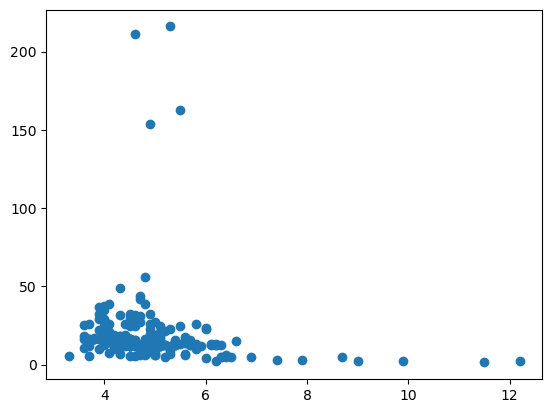

In [40]:
plt.scatter(df_data_sp98.consume, df_data_sp98.distance)

In [34]:
df_data_e10 = df_data[df_data.gas_type=='E10']

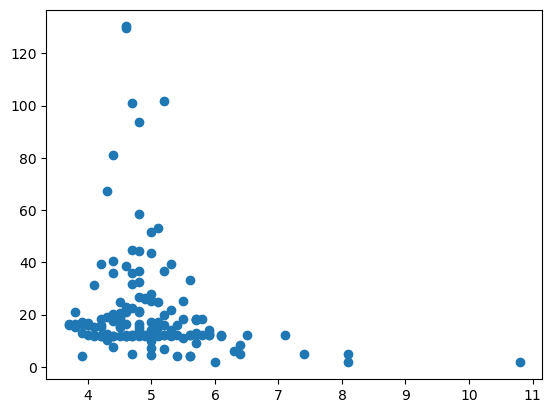

In [39]:
plt.scatter(df_data_e10.consume, df_data_e10.distance)

<AxesSubplot:>

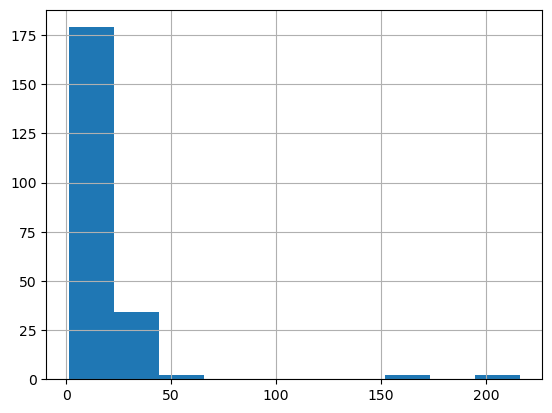

In [36]:
df_data_sp98.distance.hist()

<AxesSubplot:>

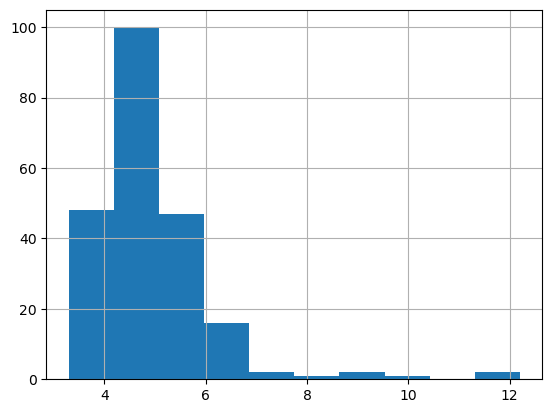

In [37]:
df_data_sp98.consume.hist()

<AxesSubplot:>

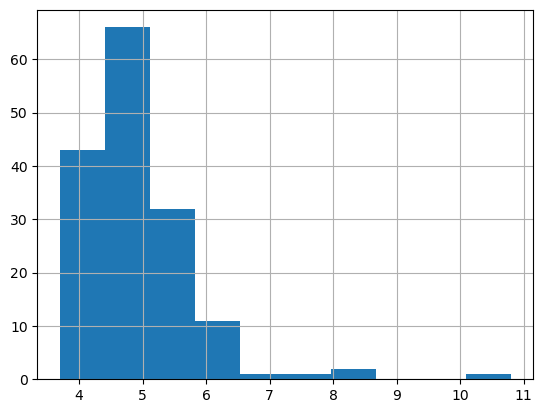

In [38]:
df_data_e10.consume.hist()

# VAMOS A REALIZAR UNA COLUMNA NUEVA, DONDE VAMOS A DIVIDIR EL CONSUMO DE DAS ENTRE LA DISTANCIA RECORRIDA, ESTO PARA DEFINIR LA EFICIENCIA DEL AUTO

In [45]:
df_data_e10['L_km'] = df_data_e10.consume/df_data_e10.distance

C:\Users\sistemas\AppData\Local\Temp\ipykernel_4524\94650237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_e10['L_km'] = df_data_e10.consume/df_data_e10.distance


<AxesSubplot:>

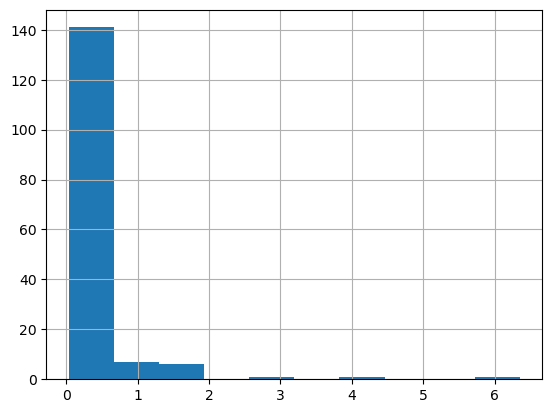

In [48]:
df_data_e10.L_km.hist()

# VAMOS A ELIMINAR LOS VALORES ATIPICOS , EN ESTE CASO LOS VALORES MAYORES A 2, TANTO PARA E10 COMO PARA SP98

In [58]:
df_data_e10_2 = df_data_e10[df_data_e10.L_km < 2]

<AxesSubplot:>

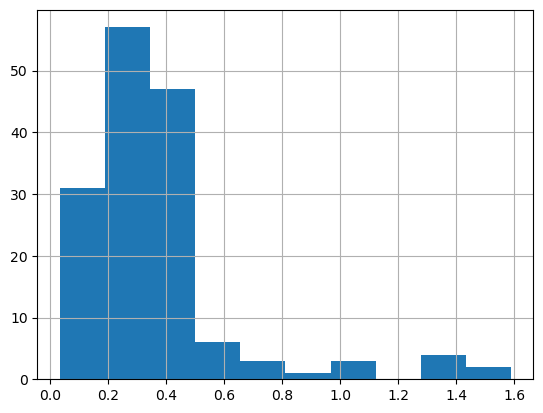

In [60]:
df_data_e10_2.L_km.hist()

In [49]:
df_data_sp98['L_km'] = df_data_sp98.consume/df_data_sp98.distance

C:\Users\sistemas\AppData\Local\Temp\ipykernel_4524\1279674521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_sp98['L_km'] = df_data_sp98.consume/df_data_sp98.distance


<AxesSubplot:>

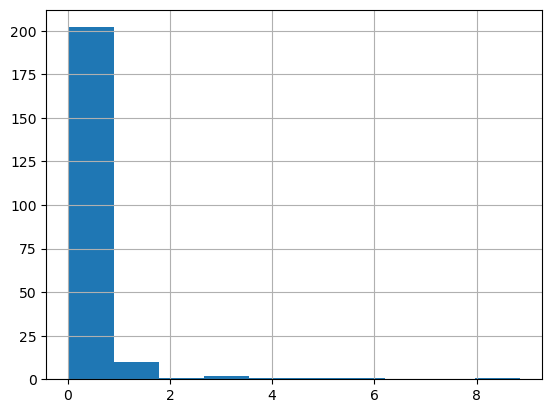

In [50]:
df_data_sp98.L_km.hist()

In [61]:
df_data_sp98_2 = df_data_sp98[df_data_sp98.L_km < 2]

<AxesSubplot:>

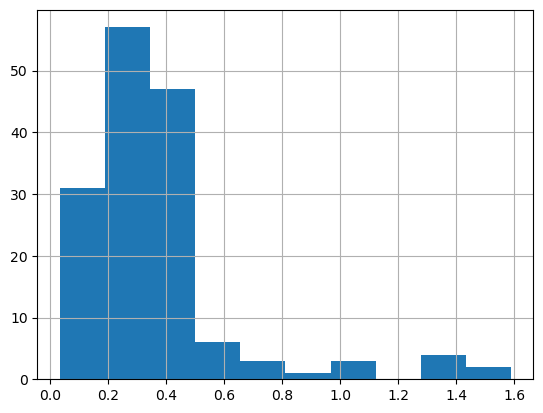

In [62]:
df_data_e10_2.L_km.hist()

# VAMOS A DEFINIR NUESTRA PRUEBA DE HIPOTESIS  Y REVISAR SI SON DEPENDIENTES AMBAS GRUPOS, DE E10 Y SP98

In [64]:
import numpy as np 
import pylab 
import scipy.stats as stats

In [72]:
stats.kendalltau(df_data_e10_2.L_km, df_data_sp98_2_eje.L_km)

KendalltauResult(correlation=0.06005191014138457, pvalue=0.2700033124378367)

In [96]:
stats.spearmanr(df_data_e10_2.L_km, df_data_sp98_2_eje.L_km)

SpearmanrResult(correlation=0.0844485775157058, pvalue=0.29773521670111514)

In [97]:
stats.pearsonr(df_data_e10_2.L_km, df_data_sp98_2_eje.L_km)

PearsonRResult(statistic=0.021834607428596997, pvalue=0.788095299048337)

# NO podemos rechazar la hipotesis nula de que no hay relacion y concluir que NO hay dependencia (tienden a ser similares)

In [66]:
df_data_e10_2.shape

(154, 11)

In [67]:
df_data_sp98_2.shape

(212, 10)

In [71]:
df_data_sp98_2_eje = df_data_sp98_2[:154]

In [73]:
stats.ttest_rel(df_data_e10_2.L_km, df_data_sp98_2_eje.L_km)

Ttest_relResult(statistic=-1.2735132660849164, pvalue=0.20476733452624335)

# No podemos rechazar la hipotesis nula y podemos concluir que las medias el consumo de gasolia/distancia (L/Km) (es decir que son iguales)

In [98]:
stats.ttest_ind(df_data_e10_2.L_km, df_data_sp98_2_eje.L_km)

Ttest_indResult(statistic=-1.2595332331841702, pvalue=0.20879763949645938)

In [92]:
df_data_sp98_2_eje['e10'] = df_data_e10_2.L_km

C:\Users\sistemas\AppData\Local\Temp\ipykernel_4524\1286088918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_sp98_2_eje['e10'] = df_data_e10_2.L_km


C:\Users\sistemas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sistemas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


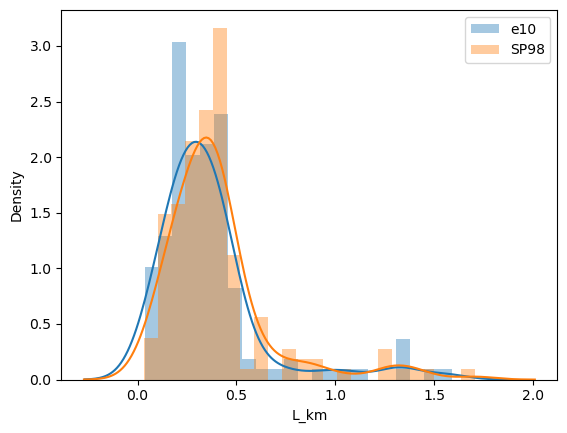

In [95]:
sns.distplot(df_data_sp98_2_eje.e10, label = 'e10')
sns.distplot(df_data_sp98_2_eje.L_km, label = 'SP98')
plt.legend()

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df_data_sp98_2_eje

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,L_km,e10
44,5.4,3.3,32,"21,5",7,SP98,0,0,0,0.611111,NaN
46,14.2,5.1,32,"21,5",7,SP98,0,0,0,0.359155,NaN
47,16.0,4.9,25,"21,5",8,SP98,0,0,0,0.306250,NaN
48,11.8,4.9,25,"21,5",11,SP98,0,0,0,0.415254,NaN
49,27.3,4.7,36,"21,5",10,SP98,0,0,0,0.172161,NaN
...,...,...,...,...,...,...,...,...,...,...,...
301,19.0,5.0,35,22,15,SP98,1,0,1,0.263158,NaN
302,16.6,4.4,46,22,5,SP98,1,0,0,0.265060,NaN
303,29.9,4.5,32,22,18,SP98,1,0,0,0.150502,NaN
304,16.0,3.8,42,22,11,SP98,0,0,0,0.237500,NaN


In [84]:
df_data_e10_2.L_km

0      0.178571
1      0.350000
2      0.491071
3      0.302326
4      0.243243
         ...   
344    0.316770
345    0.250000
346    0.311688
347    0.226744
348    0.277108
Name: L_km, Length: 154, dtype: float64

In [90]:
df_data_sp98_2_eje.reset_index(inplace=True)

In [91]:
df_data_e10_2.reset_index(inplace=True)

In [100]:
df_data_e10[df_data_e10.L_km > 2]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,L/km,L_km
147,1.7,10.8,14,"21,5",10,E10,0,1,0,6.352941,6.352941
254,2.0,8.1,20,"22,5",14,E10,0,0,0,4.050000,4.050000
258,2.0,6.0,22,"22,5",14,E10,0,0,0,3.000000,3.000000


In [102]:
df_data_sp98[df_data_sp98.L_km > 2]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,L_km
45,2.0,9.9,21,"21,5",4,SP98,0,0,0,4.950000
60,2.9,7.9,18,"21,5",9,SP98,1,1,0,2.724138
61,2.1,12.2,23,"21,5",9,SP98,1,1,0,5.809524
71,2.0,6.2,20,"21,5",10,SP98,0,0,0,3.100000
198,2.9,7.4,24,"21,5",14,SP98,0,0,0,2.551724
206,2.4,9.0,26,20,10,SP98,0,0,0,3.750000
210,1.3,11.5,21,20,10,SP98,0,0,0,8.846154


podemos definir que los altos consumos de gas 
y bajas distancias, es por que se tenia una tempetura exterior muy baja, e interior normal, 
lo que podemos pensar que tenian encendido la calefaccion y se estaba detenido el auto